In [1]:
# !pip install scikit-learn
# !pip install statsmodels

In [2]:
# 必要なパッケージをインポート
import os
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
# import japanize_matplotlib
from pathlib import Path
# import tqdm
import random
import itertools
import seaborn as sns

random.seed(7)


In [3]:
# 乱数でデータフレーム作成
def create_df():
    random.seed(7)

    data_num = 500
    rl1 = ["zero", "one", "two", "three"]#, "four"]
    rl2 = ["a", "b", "c", "d"]#, "e"]
    rl3 = ["あ", "い", "う", "え"]#, "お"]

    value1 = random.choices(rl1, k=data_num)
    value2 = random.choices(rl2, k=data_num)
    value3 = random.choices(rl3, k=data_num)
    # value4 = [random.randrange(100, 200, 2) for i in range(data_num)]
    value4 = [random.randrange(500, 1000, 10) for i in range(data_num)]

    dict_test = dict(col1=value1, col2=value2, col3=value3, col4=value4)# , col5=value5)
    df = pd.DataFrame(data=dict_test)
    return df
df = create_df()
display(df.shape)
display(df.head(5))

(500, 4)

,col1,col2,col3,col4
0,one,c,え,930
1,zero,b,あ,540
2,two,c,え,610
3,zero,a,え,900
4,two,a,う,730


In [4]:
col1 = "col1"
col2 = "col2"
col3 = "col3"
col4 = "col4"
concat_col = f"{col1}_{col2}_{col3}"

df[concat_col] = df[col1] + df[col2] + df[col3]
df

,col1,col2,col3,col4,col1_col2_col3
0,one,c,え,930,onecえ
1,zero,b,あ,540,zerobあ
2,two,c,え,610,twocえ
3,zero,a,え,900,zeroaえ
4,two,a,う,730,twoaう
...,...,...,...,...,...
495,two,d,う,970,twodう
496,two,c,う,530,twocう
497,zero,a,え,610,zeroaえ
498,zero,c,い,950,zerocい


In [5]:
nm_li = list(df[col3].unique())
df_temp = pd.DataFrame()
for nm in nm_li:
    df1 = df[df[col3] == nm]
    df1_agg = (
        pd.DataFrame(
        pd.DataFrame(df1[[concat_col, col4]].groupby(concat_col).sum())
        # .rename(columns={col1:"取引回数"})
        #.sort_values(by="取引回数", ascending=False)
        #["取引回数"]
        .reset_index()
        )
    )
    df1_agg[col3] = nm
    df_temp = pd.concat([df_temp, df1_agg], axis=0)
    
df_sum = df_temp.copy()
df_sum

,col1_col2_col3,col4,col3
0,oneaえ,9050,え
1,onebえ,5420,え
2,onecえ,4220,え
3,onedえ,3510,え
4,threeaえ,3820,え
...,...,...,...
11,twodい,5550,い
12,zeroaい,7180,い
13,zerobい,5350,い
14,zerocい,4050,い


<Axes: >

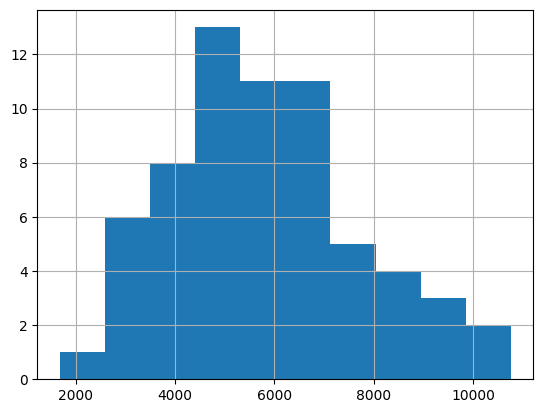

In [6]:
df_sum[col4].hist()

/Users/wakamatsuikuma/.pyenv/versions/3.10.7/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 12360 (\N{HIRAGANA LETTER E}) missing from current font.
  func(*args, **kwargs)
/Users/wakamatsuikuma/.pyenv/versions/3.10.7/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 12354 (\N{HIRAGANA LETTER A}) missing from current font.
  func(*args, **kwargs)
/Users/wakamatsuikuma/.pyenv/versions/3.10.7/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 12358 (\N{HIRAGANA LETTER U}) missing from current font.
  func(*args, **kwargs)
/Users/wakamatsuikuma/.pyenv/versions/3.10.7/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 12356 (\N{HIRAGANA LETTER I}) missing from current font.
  func(*args, **kwargs)
/Users/wakamatsuikuma/.pyenv/versions/3.10.7/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12360 (\N{HIRAGANA LETTER E}) missing from current font.
  fig.canvas.p

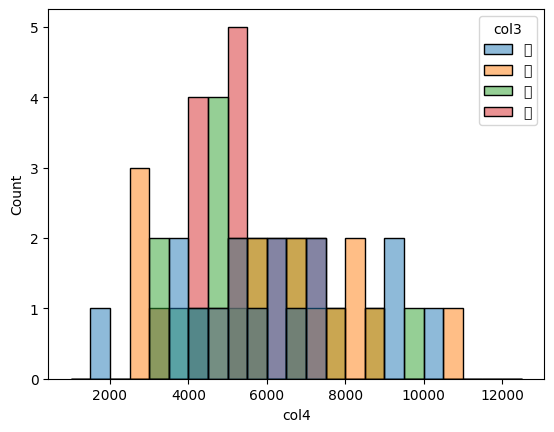

In [7]:
hist_df = df_sum
fig, ax = plt.subplots()
sns.histplot(data = hist_df, x = col4, hue = col3,
             bins=np.arange(1000, 13000, 500), 
             # kde = True
             )
ax.set_title("");

In [8]:
criterion1 = 4000
criterion2 = 6500
criterion3 = 8000

df_temp2 = pd.DataFrame()
nm_li = list(df_sum[col3].unique())
for nm in nm_li:
    df_sum_sel = df_sum[df_sum[col3] == nm]
    less4500_num = len(df_sum_sel[df_sum_sel[col4] <= criterion1])
    less6000_num = len(df_sum_sel[(df_sum_sel[col4] >= criterion1) & (df_sum_sel[col4] <= criterion2)])
    less8000_num = len(df_sum_sel[(df_sum_sel[col4] >= criterion2) & (df_sum_sel[col4] <= criterion3)])
    over8000_num = len(df_sum_sel[df_sum_sel[col4] >= criterion3])
    sum_num = less4500_num + less6000_num + less8000_num + over8000_num

    df_sum_sel_cnt = pd.DataFrame({"name": [nm],
                "criterion1以下":[less4500_num],
                "criterion2以下":[less6000_num],
                "criterion3以下":[less8000_num],
                "criterion3以上":[over8000_num],
                "total": [sum_num]})
    df_temp2 = pd.concat([df_temp2, df_sum_sel_cnt], axis=0).reset_index(drop=True)

df_sum_cnt = df_temp2.copy()
sum_row = df_sum_cnt.iloc[:, 1:].sum()# 各列の合計を計算
sum_li = sum_row.tolist()
sum_li.insert(0, 0)
df_sum_cnt.loc["total"] = sum_li
df_sum_cnt.loc["total", "name"] = "total"
cnt_df = df_sum_cnt.reset_index(drop=True)
cnt_df

,name,criterion1以下,criterion2以下,criterion3以下,criterion3以上,total
0,え,3,7,3,3,16
1,あ,3,5,4,4,16
2,う,3,8,3,2,16
3,い,1,12,3,0,16
4,total,10,32,13,9,64


In [9]:
ratio_df = cnt_df.copy()
ratio_df["criterion1以下"] = round(ratio_df["criterion1以下"] / ratio_df["total"] * 100)
ratio_df["criterion2以下"] = round(ratio_df["criterion2以下"] / ratio_df["total"] * 100)
ratio_df["criterion3以下"] = round(ratio_df["criterion3以下"] / ratio_df["total"] * 100)
ratio_df["criterion3以上"] = round(ratio_df["criterion3以上"] / ratio_df["total"] * 100)

ratio_df

,name,criterion1以下,criterion2以下,criterion3以下,criterion3以上,total
0,え,19.0,44.0,19.0,19.0,16
1,あ,19.0,31.0,25.0,25.0,16
2,う,19.0,50.0,19.0,12.0,16
3,い,6.0,75.0,19.0,0.0,16
4,total,16.0,50.0,20.0,14.0,64
